# Librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# import plotly.express as px
# import plotly.graph_objects as go
# import matplotlib.pyplot as plt
# import json

# Datos

In [2]:
df = pd.read_csv('../../Data/IPS_Atencion_Capacidad_Transformed.csv')

In [3]:
df

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
0,50010001201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,50010016401,NaN,Privada,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
2,50010025201,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,50010025204,NaN,Privada,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4,50010029701,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15542,996240000609,2.0,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15543,997730000607,2.0,Pública,3,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15544,997730011401,NaN,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15545,997730013001,NaN,Privada,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df_publicas = df[df['naturaleza'] == 'Pública'].copy()
df_publicas.dropna(inplace=True)
df_publicas['num nivel atencion'] = df_publicas['num nivel atencion'].astype('int64')

In [5]:
df_publicas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3312 entries, 79 to 15543
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   codigo_sede                                        3312 non-null   int64 
 1   num nivel atencion                                 3312 non-null   int64 
 2   naturaleza                                         3312 non-null   object
 3   Ambulancias-Básica                                 3312 non-null   int64 
 4   Ambulancias-Medicalizada                           3312 non-null   int64 
 5   Camas-Adultos                                      3312 non-null   int64 
 6   Camas-Atención del Parto                           3312 non-null   int64 
 7   Camas-Cuidado Agudo Mental                         3312 non-null   int64 
 8   Camas-Cuidado Intensivo Adulto                     3312 non-null   int64 
 9   Camas-Cuidado Intensiv

In [6]:
df_publicas

,codigo_sede,num nivel atencion,naturaleza,Ambulancias-Básica,Ambulancias-Medicalizada,Camas-Adultos,Camas-Atención del Parto,Camas-Cuidado Agudo Mental,Camas-Cuidado Intensivo Adulto,Camas-Cuidado Intensivo Neonatal,...,Salas-Procedimientos,Salas-Quirófano,Salas-Sala de Cirugía,Salas-Sala de Radioterapia,Sillas-Otras patologías,Sillas-SPA,Sillas-Salud Mental,Sillas-Sillas de Hemodiálisis,Sillas-Sillas de Quimioterapia,Unidad movil-Unidad Móvil
79,50010214401,3,Pública,0,0,176,0,0,48,10,...,3,8,0,0,0,0,0,0,4,0
87,50010217802,2,Pública,0,2,47,0,0,0,0,...,1,0,3,0,0,0,0,0,0,0
88,50010217804,2,Pública,0,0,43,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
89,50010217807,2,Pública,0,0,12,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
90,50010217808,2,Pública,24,0,34,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,976660000103,2,Pública,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15536,990010000601,2,Pública,3,0,15,0,0,0,0,...,1,0,2,0,0,0,0,0,0,1
15540,995240000608,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15542,996240000609,2,Pública,2,0,6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Desbalanceo

In [7]:
df_publicas.groupby(['num nivel atencion']).agg(count=('codigo_sede', 'count'))

,count
num nivel atencion,
1,2738
2,416
3,158


# Modelo

## X and Y

In [8]:
y = df_publicas['num nivel atencion'].copy()
X = df_publicas[list(df_publicas.columns)[3:]].copy()

## Train - Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1, shuffle=True)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2318, 63), (994, 63), (2318,), (994,))

## Scale

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Training

In [18]:
clf_knn = KNeighborsClassifier(n_neighbors=4)
clf_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

## Testing

In [19]:
predictions = clf_knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

### K = 1

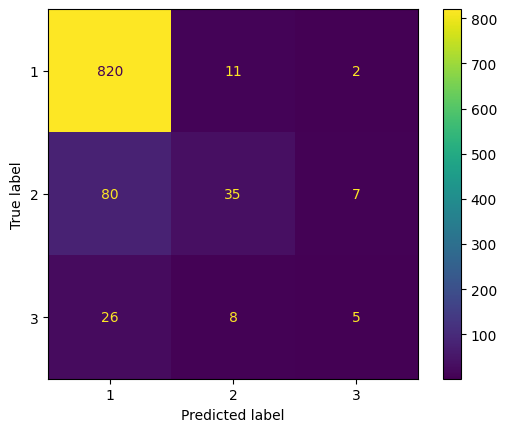

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [143]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.88      0.89       833
           2       0.37      0.33      0.35       122
           3       0.11      0.18      0.14        39

    accuracy                           0.79       994
   macro avg       0.46      0.46      0.46       994
weighted avg       0.80      0.79      0.79       994



### K = 3

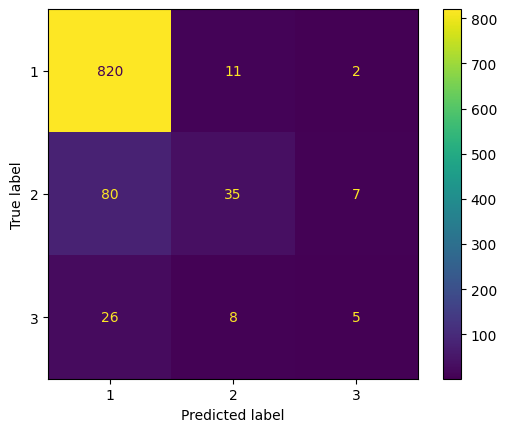

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [16]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.98      0.93       833
           2       0.65      0.29      0.40       122
           3       0.36      0.13      0.19        39

    accuracy                           0.87       994
   macro avg       0.63      0.47      0.51       994
weighted avg       0.84      0.87      0.84       994



In [17]:
roc_auc_score(y_test, clf_knn.predict_proba(X_test_scaled), multi_class='ovo')

0.6701774026129997

### K = 4

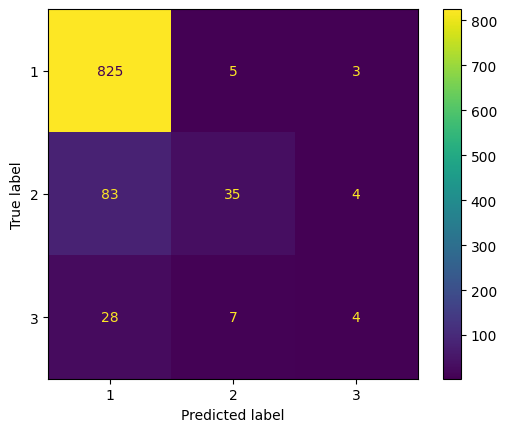

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.99      0.93       833
           2       0.74      0.29      0.41       122
           3       0.36      0.10      0.16        39

    accuracy                           0.87       994
   macro avg       0.66      0.46      0.50       994
weighted avg       0.84      0.87      0.84       994



### K = 5

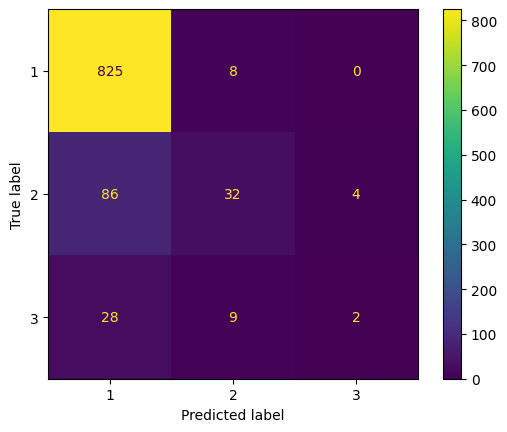

In [110]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [111]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.99      0.93       833
           2       0.65      0.26      0.37       122
           3       0.33      0.05      0.09        39

    accuracy                           0.86       994
   macro avg       0.62      0.43      0.46       994
weighted avg       0.83      0.86      0.83       994



### K = 7

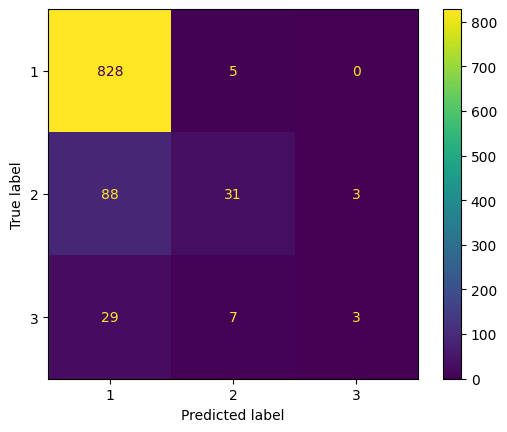

In [91]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [92]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.99      0.93       833
           2       0.72      0.25      0.38       122
           3       0.50      0.08      0.13        39

    accuracy                           0.87       994
   macro avg       0.70      0.44      0.48       994
weighted avg       0.84      0.87      0.83       994



### K = 10

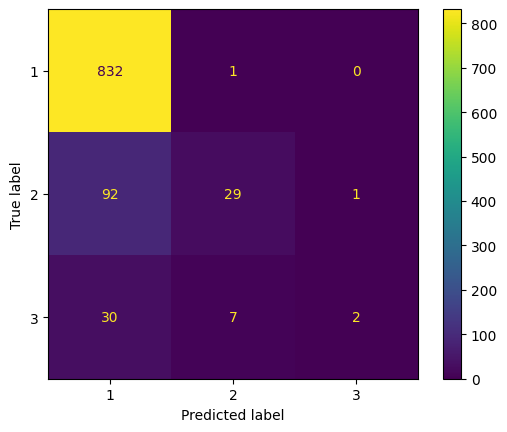

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93       833
           2       0.78      0.24      0.36       122
           3       0.67      0.05      0.10        39

    accuracy                           0.87       994
   macro avg       0.77      0.43      0.46       994
weighted avg       0.85      0.87      0.83       994



## Oversampling

In [181]:
sm = SMOTE(random_state=1)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

In [22]:
ros = RandomOverSampler(random_state=1)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

In [23]:
X_train_resample.shape, X_test.shape, y_train_resample.shape, y_test.shape

((5715, 63), (994, 63), (5715,), (994,))

In [24]:
counter = Counter(y)
counter1 = Counter(y_train)
counter2 = Counter(y_train_resample)

In [25]:
counter, counter1, counter2

(Counter({1: 2738, 2: 416, 3: 158}),
 Counter({1: 1905, 2: 294, 3: 119}),
 Counter({1: 1905, 2: 1905, 3: 1905}))

## Scale

In [26]:
scaler = StandardScaler()
scaler.fit(X_train_resample)
X_train_scaled = scaler.transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

## Training

In [27]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train_scaled, y_train_resample)

KNeighborsClassifier(n_neighbors=3)

## Testing

In [28]:
predictions = clf_knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)

## SMOTE

### K = 1

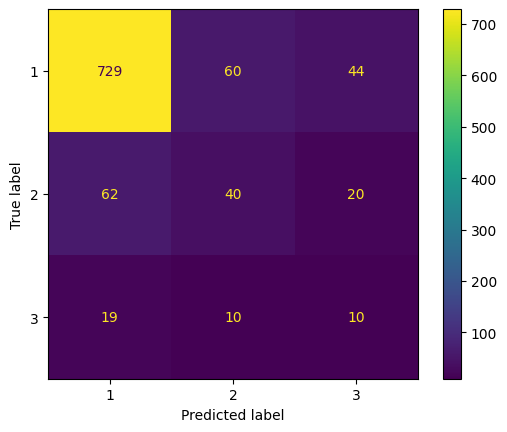

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89       833
           2       0.36      0.33      0.34       122
           3       0.14      0.26      0.18        39

    accuracy                           0.78       994
   macro avg       0.47      0.49      0.47       994
weighted avg       0.80      0.78      0.79       994



### K = 3

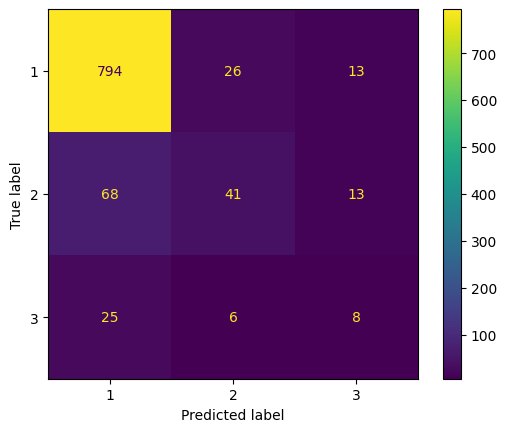

In [188]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [189]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92       833
           2       0.56      0.34      0.42       122
           3       0.24      0.21      0.22        39

    accuracy                           0.85       994
   macro avg       0.56      0.50      0.52       994
weighted avg       0.83      0.85      0.83       994



In [190]:
roc_auc_score(y_test, clf_knn.predict_proba(X_test_scaled), multi_class='ovo')

0.6607569257211081

### K = 4

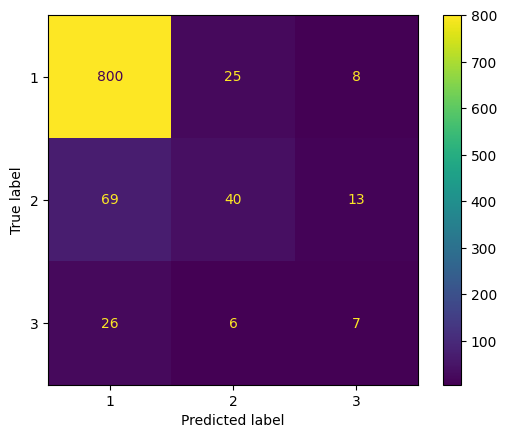

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.96      0.93       833
           2       0.56      0.33      0.41       122
           3       0.25      0.18      0.21        39

    accuracy                           0.85       994
   macro avg       0.57      0.49      0.52       994
weighted avg       0.83      0.85      0.84       994



### K = 5

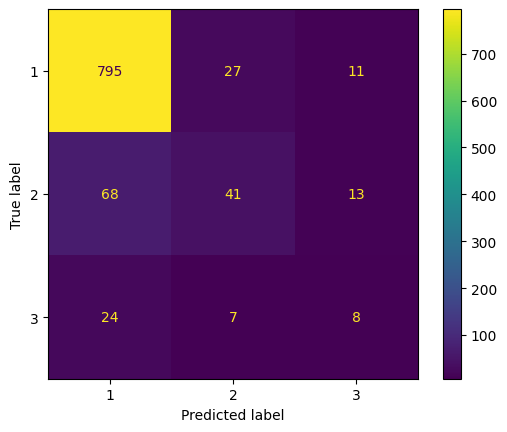

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.95      0.92       833
           2       0.55      0.34      0.42       122
           3       0.25      0.21      0.23        39

    accuracy                           0.85       994
   macro avg       0.56      0.50      0.52       994
weighted avg       0.83      0.85      0.83       994



## Random Over Sampler

### K = 1

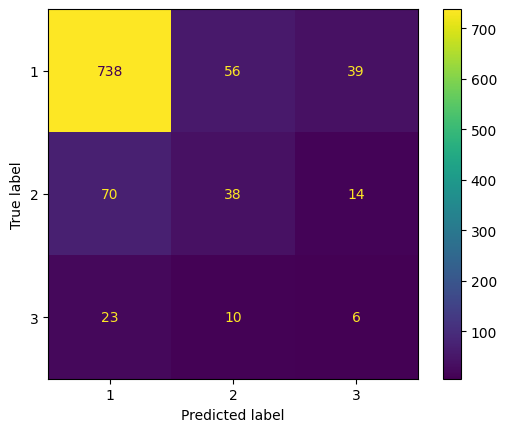

In [78]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89       833
           2       0.37      0.31      0.34       122
           3       0.10      0.15      0.12        39

    accuracy                           0.79       994
   macro avg       0.45      0.45      0.45       994
weighted avg       0.79      0.79      0.79       994



### K = 3

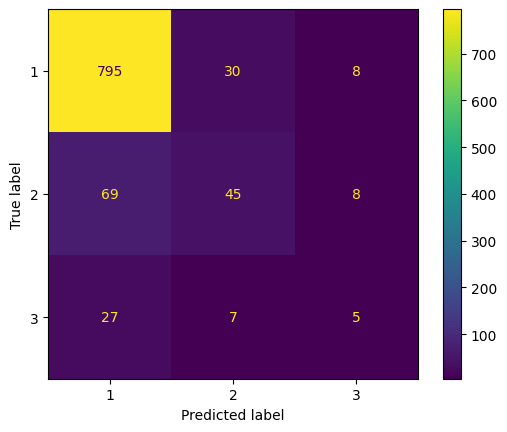

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.95      0.92       833
           2       0.55      0.37      0.44       122
           3       0.24      0.13      0.17        39

    accuracy                           0.85       994
   macro avg       0.56      0.48      0.51       994
weighted avg       0.82      0.85      0.83       994



In [180]:
roc_auc_score(y_test, clf_knn.predict_proba(X_test_scaled), multi_class='ovo')

0.6412307882379517

### K = 4

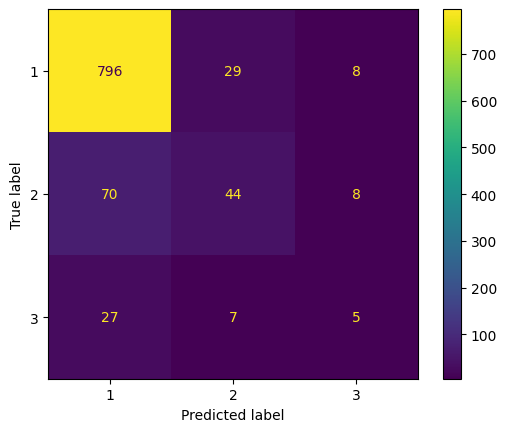

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.96      0.92       833
           2       0.55      0.36      0.44       122
           3       0.24      0.13      0.17        39

    accuracy                           0.85       994
   macro avg       0.56      0.48      0.51       994
weighted avg       0.82      0.85      0.83       994



### K = 5

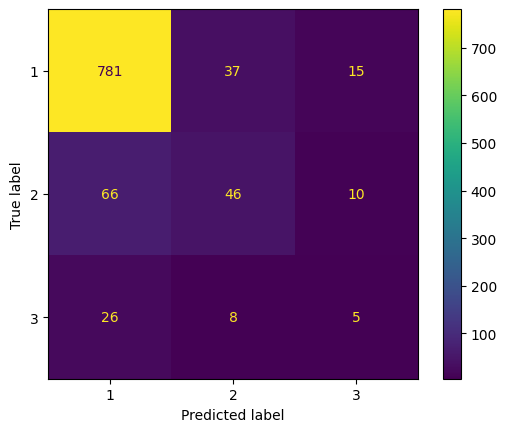

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.89      0.94      0.92       833
           2       0.51      0.38      0.43       122
           3       0.17      0.13      0.14        39

    accuracy                           0.84       994
   macro avg       0.52      0.48      0.50       994
weighted avg       0.82      0.84      0.83       994

